# Introduction
### Plant diseases pose a significant threat to agricultural productivity and food security. Early detection of diseases in crops like corn, potato, 
### and tomato is critical to prevent yield loss and ensure sustainable farming practices. Traditional manual inspection methods are time-consuming 
### and error-prone, necessitating automated solutions powered by machine learning.

### This project leverages deep learning and computer vision to classify leaf images into three categories: Corn, Potato, and Tomato.
### By training a convolutional neural network (CNN), the system identifies patterns associated with healthy or diseased leaves, 
### enabling farmers to take timely corrective actions. The model uses TensorFlow/Keras and achieves high accuracy through image preprocessing,
### data augmentation, and transfer learning techniques.

# IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical, plot_model
import os
import zipfile
import io
from google.colab import files

# UPLOAD FILES

In [2]:
uploaded=files.upload()

Saving Tomato.zip to Tomato.zip
Saving Potato.zip to Potato.zip
Saving Corn.zip to Corn.zip


In [3]:
for file in ['Corn.zip','Potato.zip','Tomato.zip']:
  with zipfile.ZipFile(file,'r')as zip_ref:
    zip_ref.extractall(f"/content/dataset/{file.split('.')[0]}")

In [4]:
df_path="/content/dataset"

In [5]:
df_gen= ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_gen=df_gen.flow_from_directory(df_path,target_size=(150,150),batch_size=32,class_mode='categorical',color_mode='rgb',subset='training')

Found 720 images belonging to 3 classes.


In [7]:
val_gen=df_gen.flow_from_directory(df_path,target_size=(150,150),batch_size=32,class_mode='categorical',color_mode='rgb',subset='validation')

Found 180 images belonging to 3 classes.


# CREATING LAYERS

In [8]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
train_gen.image_shape

(150, 150, 3)

In [10]:
val_gen.image_shape

(150, 150, 3)

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history=model.fit(train_gen,epochs=5,batch_size=64,verbose=1,validation_data=(val_gen))

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9875 - loss: 0.0382 - val_accuracy: 0.9889 - val_loss: 0.0480
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9928 - loss: 0.0267 - val_accuracy: 0.9833 - val_loss: 0.0444
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9893 - loss: 0.0323 - val_accuracy: 0.9889 - val_loss: 0.0857
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9976 - loss: 0.0263 - val_accuracy: 1.0000 - val_loss: 0.0222
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9859 - loss: 0.0330 - val_accuracy: 0.9889 - val_loss: 0.0754


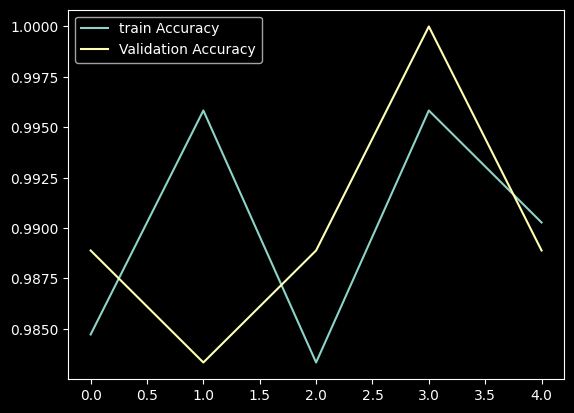

In [14]:
plt.plot(history.history['accuracy'],label='train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [23]:
img=image.load_img('/content/dataset/Tomato/Tomato/Tomato/dfce64d1-9954-4922-8beb-2681e2e6b896___GCREC_Bact.Sp 2961.JPG',target_size=(150,150))
img_array=image.img_to_array(img)/255
img_array=img_array.reshape(1,150,150,3)

In [24]:
prediction=model.predict(img_array)
print("Predicted class:",np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted class: 2


In [25]:
class_names = ['Corn', 'Potato', 'Tomato']

prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_label = class_names[predicted_index]

print("Predicted class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class: Tomato
